In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import sqlite3

In [4]:
con = sqlite3.connect(r"C:\Users\b-sbenjamin\Downloads\database.sqlite")

In [5]:
type(con)

sqlite3.Connection

In [6]:
#this command selects all rows and columns from the table 'reviews'
az_df = pd.read_sql_query("SELECT * FROM REVIEWS", con)

In [7]:
az_df.shape

(568454, 10)

In [8]:
az_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
az_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
#helpfulness denominator is the number of people who have left a review
#Helpfulness Numerator is the number of people who found the review helpful
#the Num < Dem always

In [11]:
#for the invalid rows
az_df['HelpfulnessNumerator'] > az_df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [12]:
az_df_invalid = az_df[az_df['HelpfulnessNumerator'] > az_df['HelpfulnessDenominator']]

In [13]:
az_df_invalid

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [14]:
#this are the valid rows
az_df_valid = az_df[az_df['HelpfulnessNumerator'] <= az_df['HelpfulnessDenominator']]

In [15]:
az_df_valid.shape

(568452, 10)

In [16]:
az_df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [17]:
#this checks if the a row containing these columns/features:'UserId', 'ProfileName', 'Time' and 'Text' is duplicated
az_df_valid.duplicated(['UserId', 'ProfileName', 'Time', 'Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [18]:
az_df_valid[az_df_valid.duplicated(['UserId', 'ProfileName', 'Time', 'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [19]:
drop = az_df_valid.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'])

In [20]:
drop.shape

(393931, 10)

In [21]:
drop.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [22]:
drop['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [23]:
pd.to_datetime(drop['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [24]:
drop['Time'] = pd.to_datetime(drop['Time'], unit='s')

In [25]:
#this analyses how Amazon recommends products to users

In [26]:
drop.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [27]:
drop.shape

(393931, 10)

In [28]:
drop['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [29]:
drop['ProfileName'].nunique()

218418

In [30]:
#this gives unique users on Amazon
drop['UserId'].nunique()

256059

In [31]:
#shows the data of the UserID feature. agg takes in parameters in Key:Value pairs you can also change the order in which the values are sorted by including ascending=False
recommend_df = drop.groupby(['UserId']).agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by='ProductId', ascending=False)

In [32]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [33]:
#this manipulates the column names by renaming them in no specific order
recommend_df.columns
recommend_df.columns = ['Number_of_summaries', 'num_text', 'avg_score', 'No_of_prods_purchased']

In [34]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [35]:
recommend_df.index


Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR',
       ...
       'A2E7WIBDJR18V8', 'A2E7XIUQEXY6C8', 'A2E7YXJ2QROHI2', 'A2E803BUUBT1E',
       'A2E80ET0YJ1GH6', 'A2E80MDB9TCNGW', 'A2E80RT3HOR35T', 'A2E816C5N51F6X',
       'A2E81TVIUZI1IC', 'AZZZOVIBXHGDR'],
      dtype='object', name='UserId', length=256059)

In [36]:
recommend_df.index[0:10] #this gives the top 10 UserIDs

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [37]:
recommend_df['No_of_prods_purchased'][0:10] #this gives the top ten values 

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: No_of_prods_purchased, dtype: int64

In [38]:
recommend_df['No_of_prods_purchased'][0:10].values #this gives a count of the top ten values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

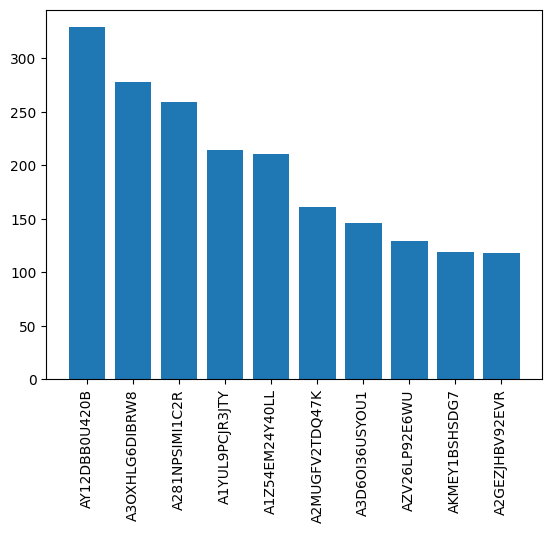

In [39]:
plt.bar(recommend_df.index[0:10], recommend_df['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation='vertical')

In [40]:
#this analyzes the product that has a good number of review and the frequently sold products that have a good number of reviews

In [41]:
az_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [42]:
az_df['ProductId']


0         B001E4KFG0
1         B00813GRG4
2         B000LQOCH0
3         B000UA0QIQ
4         B006K2ZZ7K
             ...    
568449    B001EO7N10
568450    B003S1WTCU
568451    B004I613EE
568452    B004I613EE
568453    B001LR2CU2
Name: ProductId, Length: 568454, dtype: object

In [43]:
az_df['ProductId'].unique()

array(['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', ..., 'B003S1WTCU',
       'B004I613EE', 'B001LR2CU2'], dtype=object)

In [44]:
len(az_df['ProductId'].unique()) #this checks the total number of unique products  

74258

In [45]:
az_df['ProductId'].value_counts() #this gets the frequency table of the ProductId feature 

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: count, Length: 74258, dtype: int64

In [46]:
prod_count = az_df['ProductId'].value_counts().to_frame() #this converts the frequency table to a  dataframe 

In [47]:
prod_count

,count
ProductId,
B007JFMH8M,913
B0026RQTGE,632
B002QWHJOU,632
B002QWP89S,632
B002QWP8H0,632
...,...
B004DSPTTM,1
B008C9QWU8,1
B007O5A6BM,1


In [48]:
prod_count['count']>500 #this filters the dataframe to get products with a frequency of above 500

ProductId
B007JFMH8M     True
B0026RQTGE     True
B002QWHJOU     True
B002QWP89S     True
B002QWP8H0     True
              ...  
B004DSPTTM    False
B008C9QWU8    False
B007O5A6BM    False
B003Q4TZ08    False
B001LR2CU2    False
Name: count, Length: 74258, dtype: bool

In [49]:
prod_count[prod_count['count']>500] #this gives a dataframe of the most frequently bought products

,count
ProductId,
B007JFMH8M,913
B0026RQTGE,632
B002QWHJOU,632
B002QWP89S,632
B002QWP8H0,632
B003B3OOPA,623
B001EO5Q64,567
B000VK8AVK,564
B0026KNQSA,564


In [50]:
freq_prod_ids = prod_count[prod_count['count']>500].index

In [51]:
freq_prod_ids

Index(['B007JFMH8M', 'B0026RQTGE', 'B002QWHJOU', 'B002QWP89S', 'B002QWP8H0',
       'B003B3OOPA', 'B001EO5Q64', 'B000VK8AVK', 'B0026KNQSA', 'B007M83302',
       'B001RVFEP2', 'B001RVFERK', 'B007M832YY', 'B0026KPDG8', 'B006HYLW32',
       'B0013NUGDE', 'B000KV7ZGQ', 'B000KV61FC', 'B0013A0QXC', 'B005K4Q37A',
       'B005K4Q4LK', 'B005K4Q34S', 'B005K4Q1YA', 'B000NMJWZO', 'B000UBD88A',
       'B0090X8IPM', 'B003GTR8IO', 'B007Y59HVM', 'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [52]:
az_df['ProductId'].isin(freq_prod_ids) #this is a filter for the productId in the frequent product Id dataframe

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 568454, dtype: bool

In [53]:
freq_prod_df = az_df[az_df['ProductId'].isin(freq_prod_ids)]

In [54]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,1343520000,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,1343433600,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,1343433600,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,1343433600,yummy,I love the Quaker soft baked cookies. The rea...


In [55]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

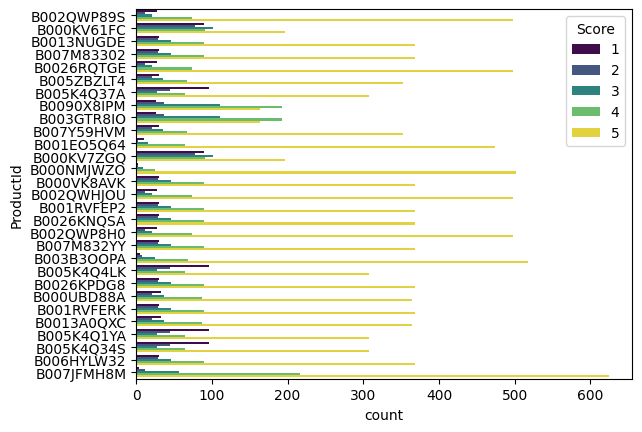

In [56]:
sns.countplot(y='ProductId', data=freq_prod_df, hue='Score', palette='viridis') #score reflects the review of a product 

In [57]:
#this analyses and gives an insight into the behaviour of amazon customers; frequent viewers that purchased a product and not frequent viewers

In [58]:
az_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [59]:
x = az_df['UserId'].value_counts()

In [60]:
x

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [61]:
az_df.head(8)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...


In [62]:
#lambda is also known as anonymous function, it is used in a code without a body; x is a series
az_df['viewer_type'] = az_df['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

In [63]:
az_df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent


In [64]:
az_df['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [65]:
az_df['viewer_type']=='Not Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 568454, dtype: bool

In [66]:
az_df['viewer_type']=='Frequent'

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: viewer_type, Length: 568454, dtype: bool

In [67]:
not_freq_df = az_df[az_df['viewer_type']=='Not Frequent'] #this is the dataframe for Amazon's not frequent viewers
freq_df = az_df[az_df['viewer_type']=='Frequent'] #this is the dataframe for Amazon's frequent viewers

In [68]:
freq_df['Score']

14        5
44        5
46        5
109       5
141       4
         ..
568261    5
568317    4
568331    4
568361    5
568367    5
Name: Score, Length: 22591, dtype: int64

In [69]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    58.850870
4    20.871143
3    10.344828
1     5.422513
2     4.510646
Name: count, dtype: float64

In [70]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

Score
5    64.086960
4    13.911916
1     9.350881
3     7.383354
2     5.266889
Name: count, dtype: float64

<Axes: xlabel='Score'>

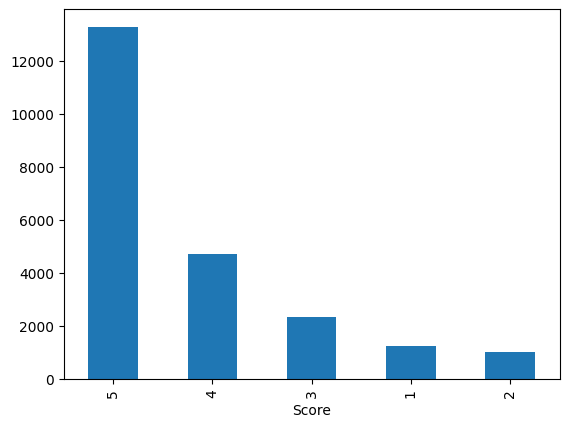

In [71]:
freq_df['Score'].value_counts().plot(kind='bar') #this plots a barplot for the frequent viewers

<Axes: xlabel='Score'>

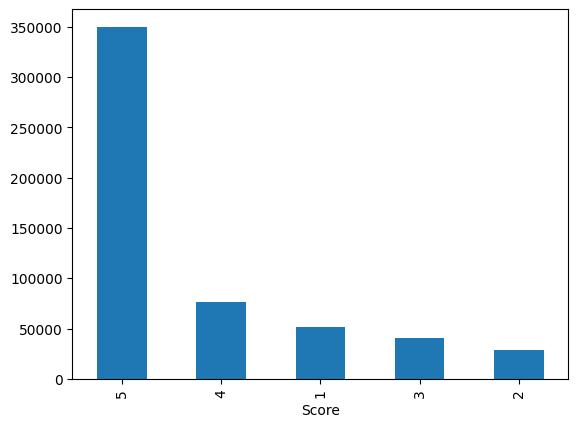

In [72]:
not_freq_df['Score'].value_counts().plot(kind='bar') #this plots a barplot for the not_frequent viewers

In [73]:
#this analysis is to determine if Amazon's frequent users are more verbose i.e they speak or share their thoughts on products, give feedbacks on e.g social media  

In [74]:
az_df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [75]:
az_df[['UserId', 'ProductId', 'Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [76]:
az_df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [77]:
type(az_df['Text'][0])

str

In [78]:
type(az_df['Text'][0].split(' '))

list

In [79]:
az_df['Text'][0].split(' ') #this uses space to separate the text data

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [80]:
len(az_df['Text'][0].split(' '))

49

In [81]:
def calculate_length(text):
    return len(text.split(' '))

In [82]:
az_df['Text_length'] = az_df['Text'].apply(calculate_length)

In [83]:
az_df['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [84]:
not_freq_az_df = az_df[az_df['viewer_type']=='Not Frequent'] 
freq_az_df = az_df[az_df['viewer_type']=='Frequent']

In [85]:
not_freq_az_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


In [86]:
not_freq_az_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type', 'Text_length'],
      dtype='object')

(0.0, 600.0)

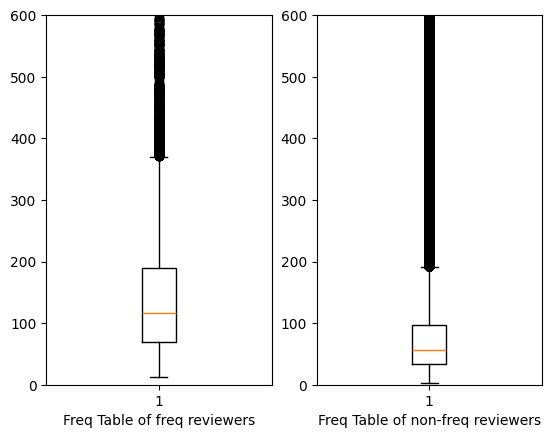

In [87]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_az_df['Text_length'])
ax1.set_xlabel('Freq Table of freq reviewers')
ax1.set_ylim(0, 600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_az_df['Text_length'])
ax2.set_xlabel('Freq Table of non-freq reviewers')
ax2.set_ylim(0, 600)

In [88]:
#this performs the sentiment analysis on the users; the sentiment value is also known as the polarity value which is from -1 to +1 this means it lies within the range of 0 to 1
#if it leans to 0 the sentiment is neutral, if it leans to 1 the sentiment is positive, if it leans to -1 it is a negative sentiment

In [203]:
!pip install textblob
from textblob import TextBlob

In [201]:
az_df['Summary'][0]

'Good Quality Dog Food'

In [205]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [207]:
#this gives only the polarity value
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [209]:
az_df.shape

(568454, 12)

In [213]:
sample = az_df[0:50000]

In [215]:
polarity = []
for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)
#exception handling for the code above using the try, except block in python

In [217]:
len(polarity)

50000

In [219]:
sample['polarity'] = polarity

In [221]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [ ]:
#this solves for the most positive and negative feedback given by users

In [223]:
sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]

In [225]:
sample_negative

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,Not Frequent,42,-0.400000
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent,22,-1.000000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,How can you go wrong!,"It is chocolate, what can I say. Great variet...",Not Frequent,36,-0.625000
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,1319414400,pretty expensive,"This bag of candy online is pretty expensive, ...",Not Frequent,30,-0.125000
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,Not Frequent,17,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49959,49960,B00430B73W,AZFWJDQFKPDDH,"Alyssa Hethcoat ""Healthy Mommy""",1,1,5,1275609600,"I'm SHOCKED, its SOOOO yummy!","I love coconut and chocolate, but wasn't sure ...",Not Frequent,79,-0.875000
49963,49964,B00430B73W,A17SE3IH8NNW3J,JayTee,1,1,5,1251936000,Raw Revolution bars,These bars make great snacks or even meal subs...,Not Frequent,55,-0.230769
49974,49975,B00430B73W,A2JZXD7XCZCOBS,Jeff Moore,4,6,5,1147651200,'Raw Revolution' Coconut Agave Bar=Excellent!,The 'Raw Revolution' Coconut Agave bar tastes ...,Not Frequent,55,-0.288462
49978,49979,B00430B73W,AH10Z566PREC6,LadyLamont,0,0,5,1332633600,Raw organic bars,"I love these healthy, organic snacks. Much he...",Not Frequent,21,-0.230769


In [227]:
sample_positive

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,Not Frequent,72,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Not Frequent,53,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Not Frequent,28,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,B00430B73W,A25B2HVKR7K9DZ,alexis,0,0,5,1262131200,Love it!!,This is one of my favorite healthy snacks. I ...,Not Frequent,19,0.781250
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...,Not Frequent,40,0.200000
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...,Not Frequent,42,0.750000
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...,Not Frequent,29,0.150000


In [ ]:
#this checks the summary features for each sample


In [229]:
sample_negative['Summary']

16                                          poor taste
26                                     Nasty No flavor
57                               How can you go wrong!
61                                    pretty expensive
62                                      stale product.
                             ...                      
49959                    I'm SHOCKED, its SOOOO yummy!
49963                              Raw Revolution bars
49974    'Raw Revolution' Coconut Agave Bar=Excellent!
49978                                 Raw organic bars
49997                   Raw Revolution Hazelnut Cashew
Name: Summary, Length: 4626, dtype: object

In [231]:
sample_positive['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
49994                                        Love it!!
49995                        Grown to really like them
49996                  Healthy Snack at a great price!
49998                    fantastic, but chew carefully
49999                          Very Tasty and Healthy.
Name: Summary, Length: 29149, dtype: object

In [233]:
from collections import Counter

In [235]:
Counter(sample_negative['Summary'])

Counter({'Disappointed': 43,
         'Disappointing': 32,
         'Bland': 20,
         'Awful': 18,
         'disappointed': 18,
         'Not what I expected': 17,
         'Terrible': 17,
         'Horrible': 14,
         'Disgusting': 12,
         "Don't waste your money": 11,
         'Not worth the money': 11,
         'Not good': 10,
         'not good': 10,
         'Very Disappointed': 9,
         'Not Good': 8,
         'Nasty': 8,
         'disappointing': 7,
         'Mediocre': 7,
         'Stale': 7,
         'Bitter': 6,
         'Waste of money': 6,
         'Addicted': 6,
         'Not impressed': 6,
         'Not great': 6,
         'Weak': 6,
         'AWFUL': 5,
         'Not very good': 5,
         'Poor Quality': 5,
         'Not worth it': 5,
         'Disappointment': 5,
         'Bad aftertaste': 5,
         'Addicted!': 5,
         'Bad': 4,
         'Disappointed!': 4,
         'too expensive': 4,
         'awful': 4,
         'Way too weak for my tastes': 

In [237]:
Counter(sample_negative['Summary']).most_common(10) #this checks for the top ten key words

[('Disappointed', 43),
 ('Disappointing', 32),
 ('Bland', 20),
 ('Awful', 18),
 ('disappointed', 18),
 ('Not what I expected', 17),
 ('Terrible', 17),
 ('Horrible', 14),
 ('Disgusting', 12),
 ("Don't waste your money", 11)]

In [239]:
Counter(sample_positive['Summary'])

Counter({'Delicious!': 204,
         'Delicious': 195,
         'Great product': 96,
         'Great': 82,
         'Love it!': 81,
         'Excellent': 78,
         'Great Product': 74,
         'Great!': 67,
         'Good stuff': 53,
         'Awesome': 52,
         'Excellent!': 45,
         'Great Coffee': 44,
         'The Best': 41,
         'Good Stuff': 41,
         'Fantastic!': 40,
         'great product': 40,
         'Love it': 38,
         'Awesome!': 38,
         'Amazing': 37,
         'Great product!': 37,
         'Good': 34,
         'delicious': 33,
         'Good product': 33,
         'Great taste': 33,
         'Perfect': 31,
         'Wonderful': 31,
         'Fantastic': 30,
         'Great Tea': 30,
         'Great coffee': 30,
         'Excellent product': 30,
         'Wonderful!': 29,
         'Amazing!': 29,
         'Love these!': 28,
         'great': 28,
         'Very good': 28,
         'Excellent Product': 26,
         'great coffee': 26,
         

In [241]:
Counter(sample_positive['Summary']).most_common(10) #this checks for the top ten key words

[('Delicious!', 204),
 ('Delicious', 195),
 ('Great product', 96),
 ('Great', 82),
 ('Love it!', 81),
 ('Excellent', 78),
 ('Great Product', 74),
 ('Great!', 67),
 ('Good stuff', 53),
 ('Awesome', 52)]